We are going to import the necessary libraries for this project which will predict diets based on various patient inputs.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Read in the dataframe

In [4]:
dataframe = pd.read_csv('diet_recommendations_dataset.csv', index_col=False)

Explore the dataset

In [6]:
dataframe.head()

,Patient_ID,Age,Gender,Weight_kg,Height_cm,BMI,Disease_Type,Severity,Physical_Activity_Level,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Dietary_Restrictions,Allergies,Preferred_Cuisine,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score,Diet_Recommendation
0,P0001,56,Male,58.4,160,22.8,Obesity,Moderate,Moderate,3079,173.3,133,116.3,NaN,Peanuts,Mexican,3.1,96.6,3.1,Balanced
1,P0002,69,Male,101.2,169,35.4,Diabetes,Mild,Moderate,3032,199.2,120,137.1,NaN,Peanuts,Chinese,4.5,63.2,0.6,Low_Carb
2,P0003,46,Female,63.5,173,21.2,Hypertension,Mild,Sedentary,1737,181.0,121,109.6,NaN,Peanuts,Chinese,3.8,57.5,4.6,Low_Sodium
3,P0004,32,Male,58.1,164,21.6,NaN,Mild,Moderate,2657,168.2,144,159.4,NaN,NaN,Mexican,4.3,54.5,0.4,Balanced
4,P0005,60,Male,79.5,197,20.5,Diabetes,Moderate,Sedentary,3496,200.4,172,182.3,Low_Sugar,NaN,Italian,9.8,78.2,4.7,Low_Carb


In [7]:
dataframe.tail()

,Patient_ID,Age,Gender,Weight_kg,Height_cm,BMI,Disease_Type,Severity,Physical_Activity_Level,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Dietary_Restrictions,Allergies,Preferred_Cuisine,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score,Diet_Recommendation
995,P0996,18,Male,72.1,160,28.2,Obesity,Moderate,Active,2639,152.6,166,125.1,Low_Sugar,NaN,Mexican,4.4,55.0,3.6,Balanced
996,P0997,35,Female,104.0,171,35.6,Hypertension,Moderate,Moderate,1661,172.2,126,78.6,Low_Sodium,NaN,Chinese,7.3,88.8,2.9,Low_Sodium
997,P0998,49,Female,56.0,182,16.9,Obesity,Severe,Moderate,3102,228.0,148,70.2,Low_Sugar,NaN,Indian,8.9,68.6,4.8,Balanced
998,P0999,64,Male,66.6,185,19.5,Diabetes,Severe,Active,3235,170.1,177,138.0,Low_Sugar,Gluten,Indian,6.7,52.0,0.1,Low_Carb
999,P1000,66,Female,101.3,194,26.9,Obesity,Severe,Moderate,2042,158.0,164,114.7,NaN,Peanuts,Italian,2.0,68.2,3.7,Balanced


In [8]:
dataframe.dtypes

Patient_ID                           object
Age                                   int64
Gender                               object
Weight_kg                           float64
Height_cm                             int64
BMI                                 float64
Disease_Type                         object
Severity                             object
Physical_Activity_Level              object
Daily_Caloric_Intake                  int64
Cholesterol_mg/dL                   float64
Blood_Pressure_mmHg                   int64
Glucose_mg/dL                       float64
Dietary_Restrictions                 object
Allergies                            object
Preferred_Cuisine                    object
Weekly_Exercise_Hours               float64
Adherence_to_Diet_Plan              float64
Dietary_Nutrient_Imbalance_Score    float64
Diet_Recommendation                  object
dtype: object

In [9]:
dataframe.describe()

,Age,Weight_kg,Height_cm,BMI,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,49.857000,84.602400,174.81700,28.191600,2475.064000,199.717900,144.993000,136.867600,5.166000,74.88430,2.469200
std,18.114267,20.088121,14.33377,8.040136,565.017032,29.080614,20.245712,37.934819,2.847995,14.82638,1.459631
min,18.000000,50.000000,150.00000,13.000000,1500.000000,150.400000,110.000000,70.200000,0.000000,50.00000,0.000000
25%,35.000000,66.600000,162.00000,22.075000,1984.750000,174.300000,128.000000,105.000000,2.800000,62.00000,1.200000
50%,50.000000,85.200000,175.00000,27.450000,2470.500000,199.850000,145.000000,138.000000,5.200000,74.20000,2.400000
75%,66.000000,102.000000,187.00000,33.425000,2937.250000,224.850000,163.000000,170.650000,7.600000,88.20000,3.700000
max,79.000000,119.700000,199.00000,52.400000,3498.000000,249.900000,179.000000,200.000000,10.000000,100.00000,5.000000


<h3>Check for missing values</h3>

In [11]:
dataframe.isnull().sum()

Patient_ID                            0
Age                                   0
Gender                                0
Weight_kg                             0
Height_cm                             0
BMI                                   0
Disease_Type                        204
Severity                              0
Physical_Activity_Level               0
Daily_Caloric_Intake                  0
Cholesterol_mg/dL                     0
Blood_Pressure_mmHg                   0
Glucose_mg/dL                         0
Dietary_Restrictions                334
Allergies                           323
Preferred_Cuisine                     0
Weekly_Exercise_Hours                 0
Adherence_to_Diet_Plan                0
Dietary_Nutrient_Imbalance_Score      0
Diet_Recommendation                   0
dtype: int64

<p>Here we can see that the column Disease_Type, Dietary_Restrictions and Allergies have missing values. Let's check the percentage of the missing values in regards to the entire dataset.</p>

In [13]:
dataframe_null_columns = dataframe[['Disease_Type','Dietary_Restrictions', 'Allergies']]
percentage_null = dataframe_null_columns.isnull().mean()*100
print('Missing Values Percentage')
print(percentage_null)

Missing Values Percentage
Disease_Type            20.4
Dietary_Restrictions    33.4
Allergies               32.3
dtype: float64


Disease Type has 20.4% missing values, dietary_restrictions has 33.4% missing values and Allergies 32.3%

Let's get a count of the values in these columns

In [16]:
disease_type_value_freq = dataframe["Disease_Type"].value_counts(dropna=False)
dietary_restrictions_freq = dataframe['Dietary_Restrictions'].value_counts(dropna=False)
allergies_freq = dataframe['Allergies'].value_counts(dropna=False)


print(disease_type_value_freq)
print('\n')
print(dietary_restrictions_freq)
print('\n')
print(allergies_freq)

Disease_Type
Hypertension    316
Diabetes        258
Obesity         222
NaN             204
Name: count, dtype: int64


Dietary_Restrictions
Low_Sodium    350
NaN           334
Low_Sugar     316
Name: count, dtype: int64


Allergies
Gluten     346
Peanuts    331
NaN        323
Name: count, dtype: int64


Since we know the percentage of the missing values, let's check the percentage of the other values in these columns

In [18]:
disease_type_value_percentage = (dataframe["Disease_Type"].value_counts() / dataframe["Disease_Type"].shape) * 100
dietary_restrictions_percentage = (dataframe["Dietary_Restrictions"].value_counts() / dataframe["Dietary_Restrictions"].shape) * 100
allergies_percentage = (dataframe["Allergies"].value_counts() / dataframe["Allergies"].shape) * 100

print(disease_type_value_percentage)
print('\n')
print(dietary_restrictions_percentage)
print('\n')
print(allergies_percentage)

Disease_Type
Hypertension    31.6
Diabetes        25.8
Obesity         22.2
Name: count, dtype: float64


Dietary_Restrictions
Low_Sodium    35.0
Low_Sugar     31.6
Name: count, dtype: float64


Allergies
Gluten     34.6
Peanuts    33.1
Name: count, dtype: float64


Lets go ahead and fill in the missing null values with the most frequent values for these columns

For Disease Type, the most frequent value is hypertension

For Dietary Restriction, the most frequent value is low sodium

For Allergies, the most frequent value is gluten

In [20]:
dataframe['Disease_Type'] = dataframe['Disease_Type'].fillna(dataframe['Disease_Type'].mode()[0])
dataframe['Dietary_Restrictions'] = dataframe['Dietary_Restrictions'].fillna(dataframe['Dietary_Restrictions'].mode()[0])
dataframe['Allergies'] = dataframe['Allergies'].fillna(dataframe['Allergies'].mode()[0])

Now that we have filled the 'None' values with the mode of the respective columns, let's check to make sure no nulls are left

In [22]:
dataframe.isnull().sum()

Patient_ID                          0
Age                                 0
Gender                              0
Weight_kg                           0
Height_cm                           0
BMI                                 0
Disease_Type                        0
Severity                            0
Physical_Activity_Level             0
Daily_Caloric_Intake                0
Cholesterol_mg/dL                   0
Blood_Pressure_mmHg                 0
Glucose_mg/dL                       0
Dietary_Restrictions                0
Allergies                           0
Preferred_Cuisine                   0
Weekly_Exercise_Hours               0
Adherence_to_Diet_Plan              0
Dietary_Nutrient_Imbalance_Score    0
Diet_Recommendation                 0
dtype: int64

All NaN values are gone. Let's now check the distributions of the disease_type, dietary_restrictions and allergies column values 

In [24]:
disease_type_value_freq = dataframe["Disease_Type"].value_counts(dropna=False)
dietary_restrictions_freq = dataframe['Dietary_Restrictions'].value_counts(dropna=False)
allergies_freq = dataframe['Allergies'].value_counts(dropna=False)


print(disease_type_value_freq)
print('\n')
print(dietary_restrictions_freq)
print('\n')
print(allergies_freq)

Disease_Type
Hypertension    520
Diabetes        258
Obesity         222
Name: count, dtype: int64


Dietary_Restrictions
Low_Sodium    684
Low_Sugar     316
Name: count, dtype: int64


Allergies
Gluten     669
Peanuts    331
Name: count, dtype: int64


In [25]:
disease_type_value_percentage = (dataframe["Disease_Type"].value_counts() / dataframe["Disease_Type"].shape) * 100
dietary_restrictions_percentage = (dataframe["Dietary_Restrictions"].value_counts() / dataframe["Dietary_Restrictions"].shape) * 100
allergies_percentage = (dataframe["Allergies"].value_counts() / dataframe["Allergies"].shape) * 100

print(disease_type_value_percentage)
print('\n')
print(dietary_restrictions_percentage)
print('\n')
print(allergies_percentage)

Disease_Type
Hypertension    52.0
Diabetes        25.8
Obesity         22.2
Name: count, dtype: float64


Dietary_Restrictions
Low_Sodium    68.4
Low_Sugar     31.6
Name: count, dtype: float64


Allergies
Gluten     66.9
Peanuts    33.1
Name: count, dtype: float64


We can see that the percentages have gone up significantly after we imputted the missing values with the mode.

Hypertension is now 52%

Low_Sodium is 68.4%

Gluten is 66.9%

We will have to check whether this will introduce bias as there may be overrepresentation of the values.

Let's drop the irrelevant columns for our analysis
In this case it will be the following:
1) Patient_ID
2) Preferred_Cuisine
4) Adherence_To_Diet_Plan

In [28]:
dataframe = dataframe.drop(['Patient_ID', 'Preferred_Cuisine', 'Adherence_to_Diet_Plan'],axis=1)

In [29]:
dataframe.columns

Index(['Age', 'Gender', 'Weight_kg', 'Height_cm', 'BMI', 'Disease_Type',
       'Severity', 'Physical_Activity_Level', 'Daily_Caloric_Intake',
       'Cholesterol_mg/dL', 'Blood_Pressure_mmHg', 'Glucose_mg/dL',
       'Dietary_Restrictions', 'Allergies', 'Weekly_Exercise_Hours',
       'Dietary_Nutrient_Imbalance_Score', 'Diet_Recommendation'],
      dtype='object')

<h3>Exploratory Data Analysis<h3>

<h3>Let's first visualize the disease type by age</h3>

[Text(0.5, 1.0, 'Physical Activity Levels For Each Age Group'),
 Text(0.5, 0, 'Disease Type')]

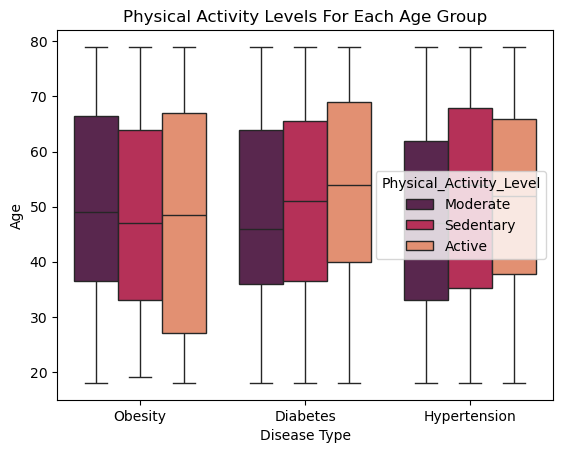

In [52]:
boxplot1 = sns.boxplot(data=dataframe, x="Disease_Type", y="Age", hue="Physical_Activity_Level", palette="rocket")
boxplot1.set(title="Physical Activity Levels For Each Age Group", xlabel="Disease Type")

Disease Type vs Gender

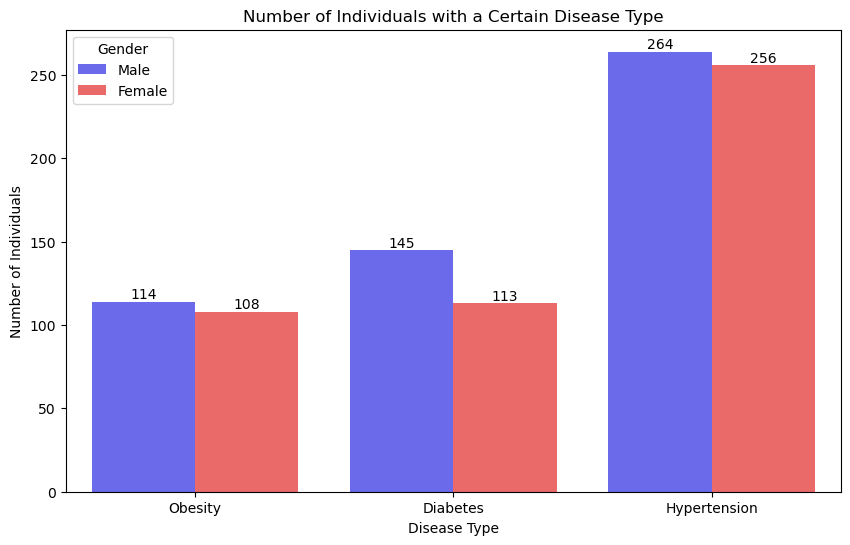

In [298]:
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(dataframe, x='Disease_Type', hue='Gender', palette='seismic')
plt.xlabel("Disease Type")
plt.ylabel("Number of Individuals")
plt.title("Number of Individuals with a Certain Disease Type")
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.show()

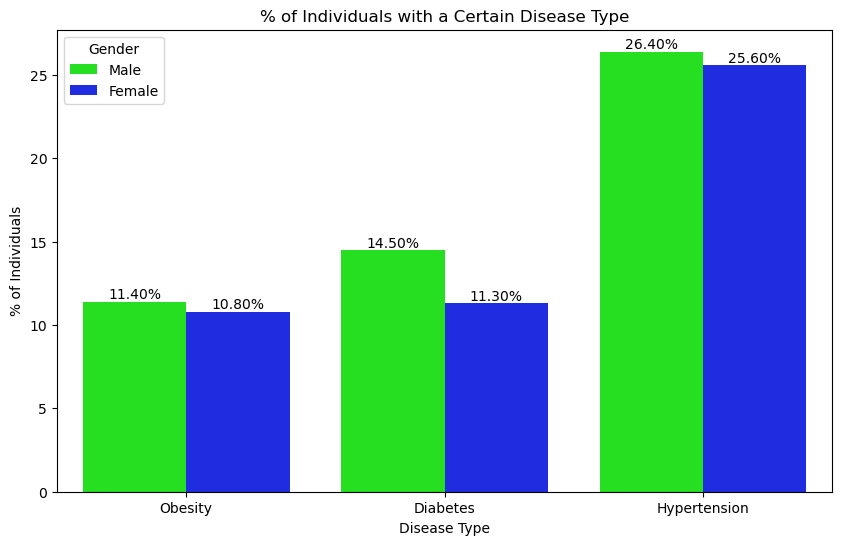

In [292]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(dataframe, x='Disease_Type', hue='Gender', stat='percent', palette="hsv")
plt.xlabel("Disease Type")
plt.ylabel("% of Individuals")
plt.title("% of Individuals with a Certain Disease Type")
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.2f%%')
ax.bar_label(ax.containers[1], label_type='edge', fmt='%.2f%%')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

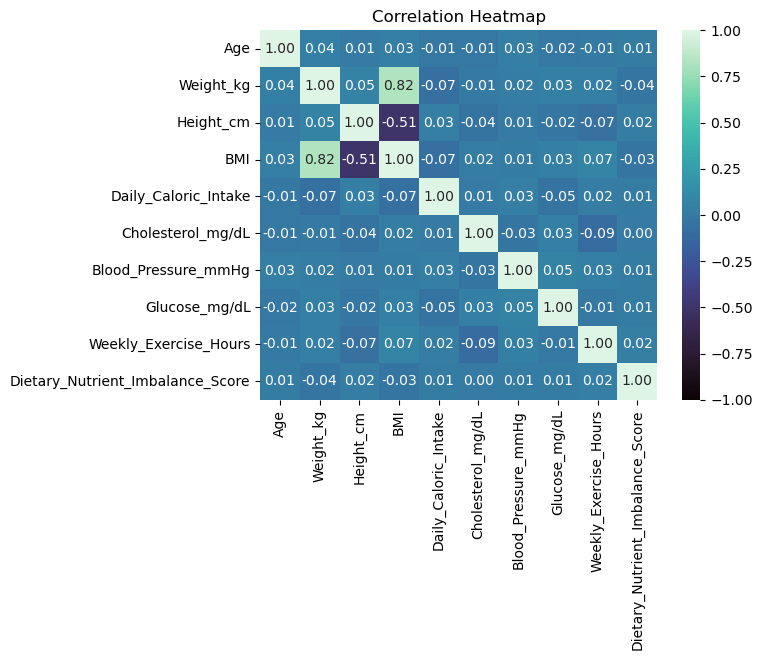

In [300]:
sns.heatmap(dataframe.corr(method='spearman', numeric_only=True), annot=True, fmt=".2f", cmap='mako', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")

<h3>The correlation coefficient matrix has affected a strong relationship between Weight and BMI. Let's visualize that using a scatterplot</h3>

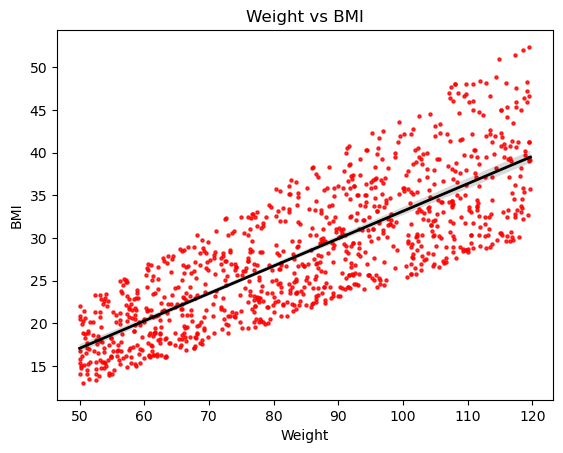

In [366]:
sns.regplot(data=dataframe, x="Weight_kg", y="BMI", scatter_kws={"color":"red", "s":5}, line_kws={'linewidth':2, 'color':'black'})
plt.xlabel('Weight')
plt.ylabel('BMI')
plt.title('Weight vs BMI')
plt.show()

From this scatterplot, we can see that BMI is dependent on the Weight. Individuals with more weight tend to have higher BMIs

Now we are going to explore the relationship between Daily Caloric Intake, Glucose Level, Blood Pressure, and Cholestorol

Text(0, 0.5, 'Blood Pressure (mmHg)')

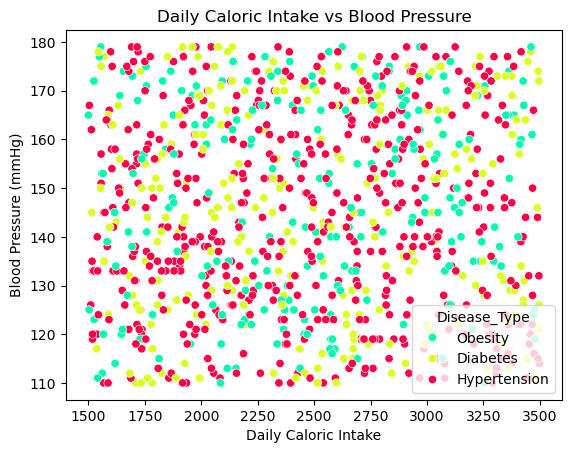

In [357]:
sns.scatterplot(data=dataframe, x='Daily_Caloric_Intake', y='Blood_Pressure_mmHg', hue='Disease_Type', palette='gist_ncar')
plt.title('Daily Caloric Intake vs Blood Pressure')
plt.xlabel('Daily Caloric Intake')
plt.ylabel('Blood Pressure (mmHg)')

Text(0, 0.5, 'Glucose Level (mg/DL)')

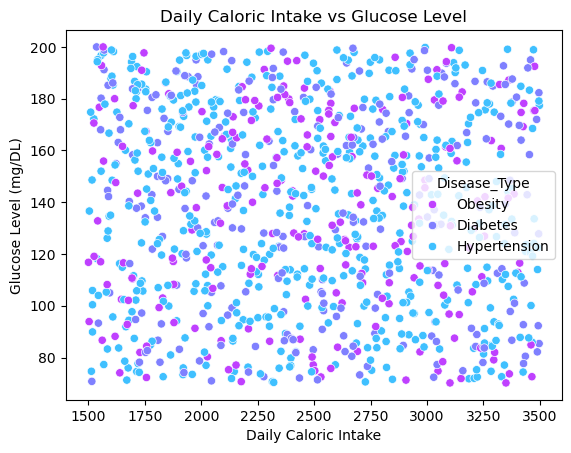

In [355]:
sns.scatterplot(data=dataframe, x="Daily_Caloric_Intake", y="Glucose_mg/dL", hue="Disease_Type", palette="cool_r")
plt.title('Daily Caloric Intake vs Glucose Level')
plt.xlabel('Daily Caloric Intake')
plt.ylabel('Glucose Level (mg/DL)')

Text(0, 0.5, 'Cholesterol Level (mg/dL)')

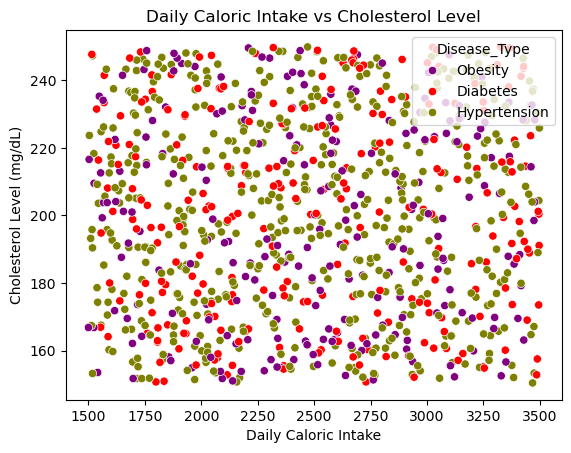

In [353]:
sns.scatterplot(data=dataframe, x='Daily_Caloric_Intake', y='Cholesterol_mg/dL', hue='Disease_Type', palette="brg")
plt.title('Daily Caloric Intake vs Cholesterol Level')
plt.xlabel('Daily Caloric Intake')
plt.ylabel('Cholesterol Level (mg/dL)')

In [362]:
dataframe['Dietary_Restrictions']

0      Low_Sodium
1      Low_Sodium
2      Low_Sodium
3      Low_Sodium
4       Low_Sugar
          ...    
995     Low_Sugar
996    Low_Sodium
997     Low_Sugar
998     Low_Sugar
999    Low_Sodium
Name: Dietary_Restrictions, Length: 1000, dtype: object

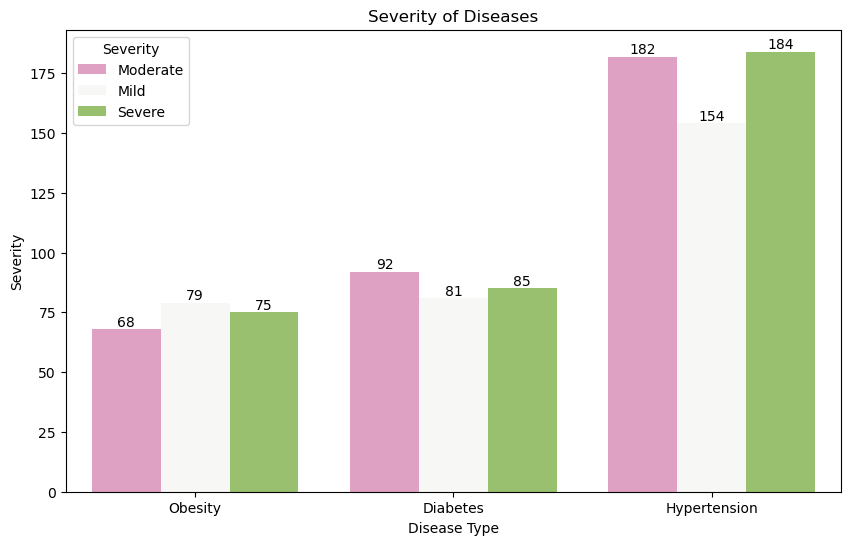

In [374]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=dataframe, x='Disease_Type', hue='Severity', palette='PiYG')
plt.title('Severity of Diseases')
plt.xlabel('Disease Type')
plt.ylabel('Severity')
ax.bar_label(ax.containers[0], label_type="edge")
ax.bar_label(ax.containers[1], label_type="edge")
ax.bar_label(ax.containers[2], label_type="edge")
plt.show()